In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
bronx_df = pd.read_csv(r'E:\Unik\четвертий курс\Перший семестр\DSBD\Lab2\data\rollingsales_bronx.csv', sep=',')
brooklyn_df = pd.read_csv(r'E:\Unik\четвертий курс\Перший семестр\DSBD\Lab2\data\rollingsales_brooklyn.csv', sep=',')
manhattan_df = pd.read_csv(r'E:\Unik\четвертий курс\Перший семестр\DSBD\Lab2\data\rollingsales_manhattan.csv', sep=',')
queens_df = pd.read_csv(r'E:\Unik\четвертий курс\Перший семестр\DSBD\Lab2\data\rollingsales_queens.csv', sep=',')
staten_island_df = pd.read_csv(r'E:\Unik\четвертий курс\Перший семестр\DSBD\Lab2\data\rollingsales_statenisland.csv', sep=',')

In [28]:
new_york = pd.concat([bronx_df, brooklyn_df, manhattan_df, queens_df, staten_island_df], axis=0, ignore_index=True)
new_york

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASEMENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3028,24,NaN,A1,410 EAST 179TH STREET,NaN,...,1,0.0,1,"1,842","2,048",1901.0,1,A1,"655,000",11/1/2022
1,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,66,NaN,A1,4453 PARK AVENUE,NaN,...,1,0.0,1,"1,646","1,497",1899.0,1,A1,"215,000",4/18/2023
2,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,66,NaN,A1,4453 PARK AVENUE,NaN,...,1,0.0,1,"1,646","1,497",1899.0,1,A1,"570,000",8/23/2023
3,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3035,52,NaN,A1,461 EAST 178 STREET,NaN,...,1,0.0,1,"1,782","1,548",1899.0,1,A1,0,4/14/2023
4,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,2904,22,NaN,B9,454 EAST 172 STREET,NaN,...,2,0.0,2,"1,658","1,428",1901.0,1,B9,"350,000",6/26/2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73300,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1,6970,84,NaN,A1,N/A LENEVAR AVENUE,NaN,...,1.0,0.0,1.0,"2,603",0,2022.0,1,V0,"1,116,638",12/19/2022
73301,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1,6970,85,NaN,A1,N/A LENEVAR AVENUE,NaN,...,1.0,0.0,1.0,"2,551",0,NaN,1,V0,"1,116,638",12/19/2022
73302,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,6970,86,NaN,V0,N/A LENEVAR AVENUE,NaN,...,0.0,0.0,0.0,"2,597",0,2023.0,1,V0,"1,116,638",12/19/2022
73303,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,6970,87,NaN,V0,96 LENEVAR AVENUE,NaN,...,0.0,0.0,0.0,"2,644",0,2023.0,1,V0,"1,116,638",12/19/2022


In [29]:
new_york.dtypes

BOROUGH                             int64
NEIGHBORHOOD                       object
BUILDING CLASS CATEGORY            object
TAX CLASS AT PRESENT               object
BLOCK                               int64
LOT                                 int64
EASEMENT                          float64
BUILDING CLASS AT PRESENT          object
ADDRESS                            object
APARTMENT NUMBER                   object
ZIP CODE                          float64
RESIDENTIAL UNITS                  object
COMMERCIAL UNITS                   object
TOTAL UNITS                        object
LAND SQUARE FEET                   object
GROSS SQUARE FEET                  object
YEAR BUILT                        float64
TAX CLASS AT TIME OF SALE           int64
BUILDING CLASS AT TIME OF SALE     object
SALE PRICE                         object
SALE DATE                          object
dtype: object

In [30]:
def clear_data(df):
  # Remove duplicate rows
  df = df.drop_duplicates()

  # Convert 'SALE DATE' column to datetime format
  df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])

  # Convert numeric columns to numeric data type
  numeric_columns = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']
  for column in numeric_columns:
    df[column] = pd.to_numeric(df[column].str.replace(',', ''))

  return df

In [31]:
new_york = clear_data(new_york)
manhattan_df = clear_data(manhattan_df)
staten_island_df = clear_data(staten_island_df)
bronx_df = clear_data(bronx_df)
brooklyn_df = clear_data(brooklyn_df)

In [32]:
new_york.dtypes

BOROUGH                                    int64
NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                      object
BLOCK                                      int64
LOT                                        int64
EASEMENT                                 float64
BUILDING CLASS AT PRESENT                 object
ADDRESS                                   object
APARTMENT NUMBER                          object
ZIP CODE                                 float64
RESIDENTIAL UNITS                         object
COMMERCIAL UNITS                          object
TOTAL UNITS                               object
LAND SQUARE FEET                         float64
GROSS SQUARE FEET                        float64
YEAR BUILT                               float64
TAX CLASS AT TIME OF SALE                  int64
BUILDING CLASS AT TIME OF SALE            object
SALE PRICE                                 int64
SALE DATE           

In [33]:
print(new_york.isnull().sum())

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                 65
BLOCK                                 0
LOT                                   0
EASEMENT                          73305
BUILDING CLASS AT PRESENT            65
ADDRESS                               0
APARTMENT NUMBER                  55608
ZIP CODE                              5
RESIDENTIAL UNITS                 17833
COMMERCIAL UNITS                  31037
TOTAL UNITS                       15504
LAND SQUARE FEET                  33366
GROSS SQUARE FEET                 33366
YEAR BUILT                         4875
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             0
dtype: int64


In [34]:
print(new_york.describe())

            BOROUGH         BLOCK           LOT  EASEMENT      ZIP CODE  \
count  73305.000000  73305.000000  73305.000000       0.0  73300.000000   
mean       2.961490   4172.508205    389.437146       NaN  10848.080246   
min        1.000000      1.000000      1.000000       NaN  10001.000000   
25%        2.000000   1263.000000     22.000000       NaN  10304.000000   
50%        3.000000   3238.000000     51.000000       NaN  11209.000000   
75%        4.000000   6201.000000   1003.000000       NaN  11356.000000   
max        5.000000  16350.000000   9079.000000       NaN  11697.000000   
std        1.298879   3548.291483    659.348616       NaN    566.823256   

       LAND SQUARE FEET  GROSS SQUARE FEET    YEAR BUILT  \
count      3.993900e+04       3.993900e+04  68430.000000   
mean       7.504976e+03       6.812155e+03   1952.779906   
min        0.000000e+00       0.000000e+00    220.000000   
25%        2.000000e+03       1.381500e+03   1925.000000   
50%        2.500000e+03 

In [35]:
def create_neighborhood_price_barplot(data, title):
  grouped_data = data.groupby('NEIGHBORHOOD')['SALE PRICE'].mean().reset_index()
  plt.figure(figsize=(15, 10))
  sns.barplot(x=grouped_data['NEIGHBORHOOD'], y=grouped_data['SALE PRICE'], alpha=0.5)
  plt.xlabel('Neighborhood')
  plt.ylabel('Average Sale Price')
  plt.xticks(rotation=45, ha='right')
  plt.title(f'Average Sale Price by Neighborhood in {title}')
  plt.show()


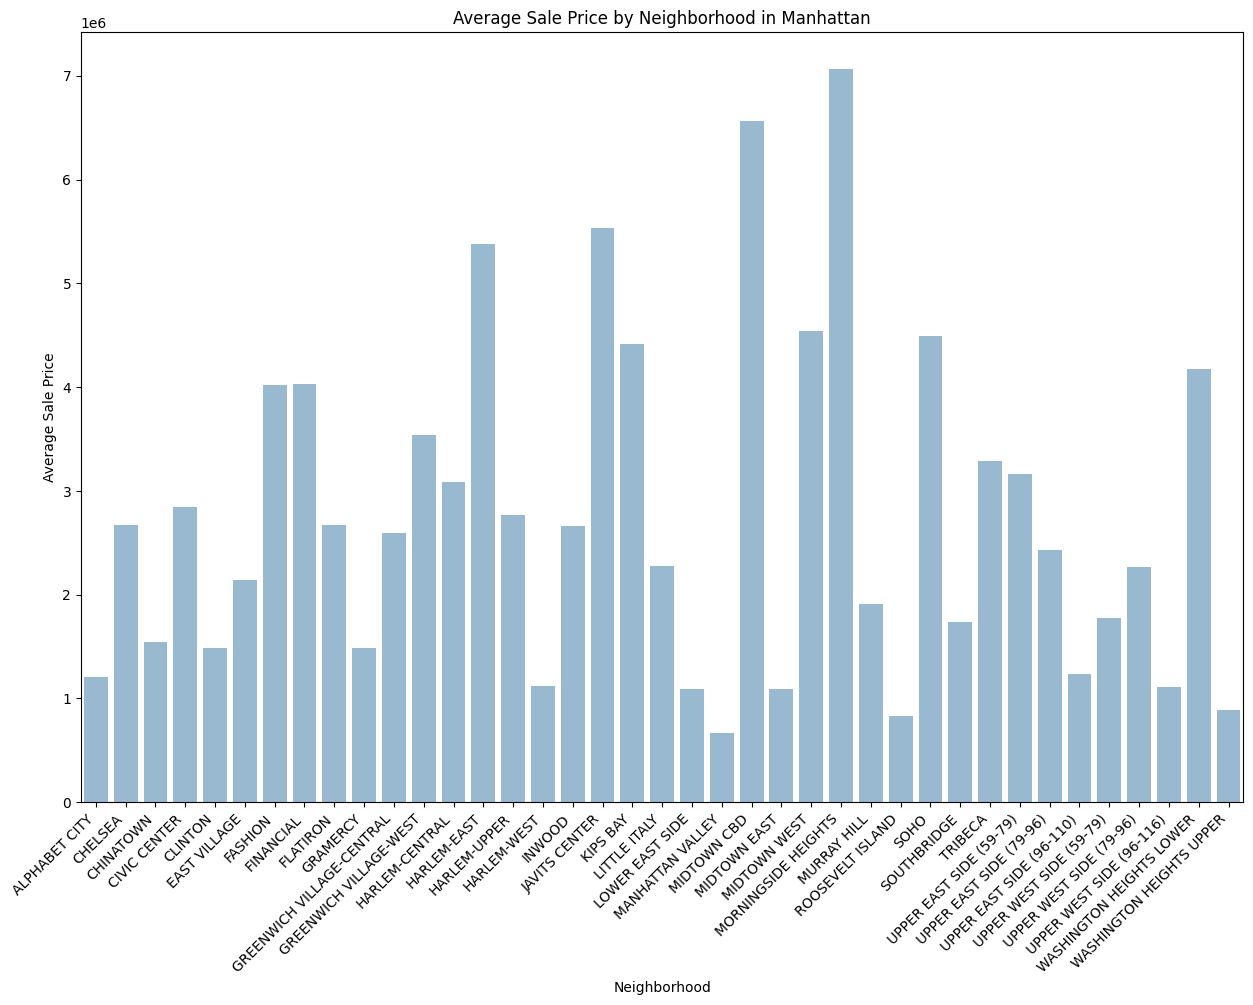

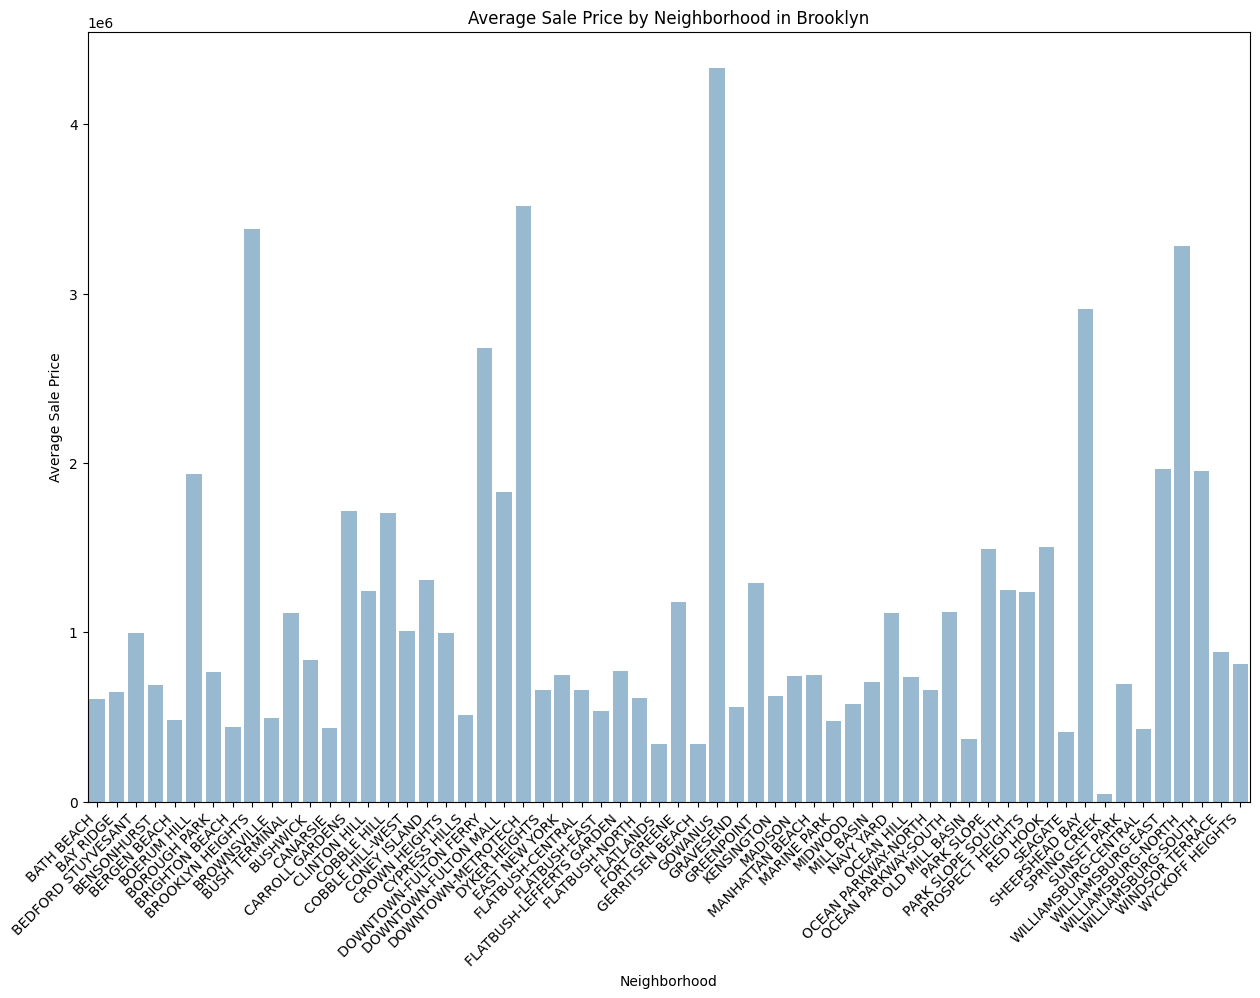

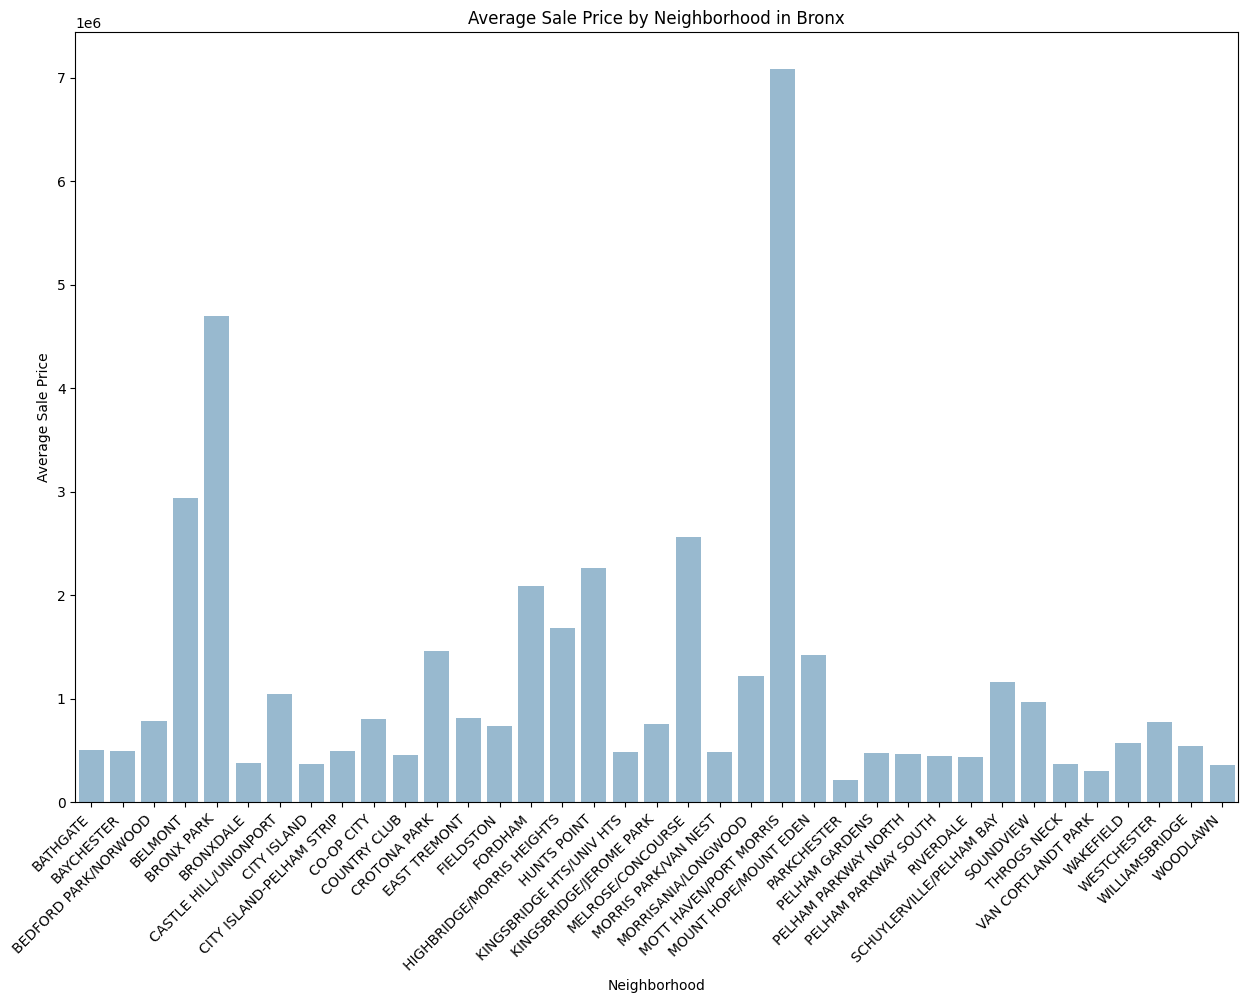

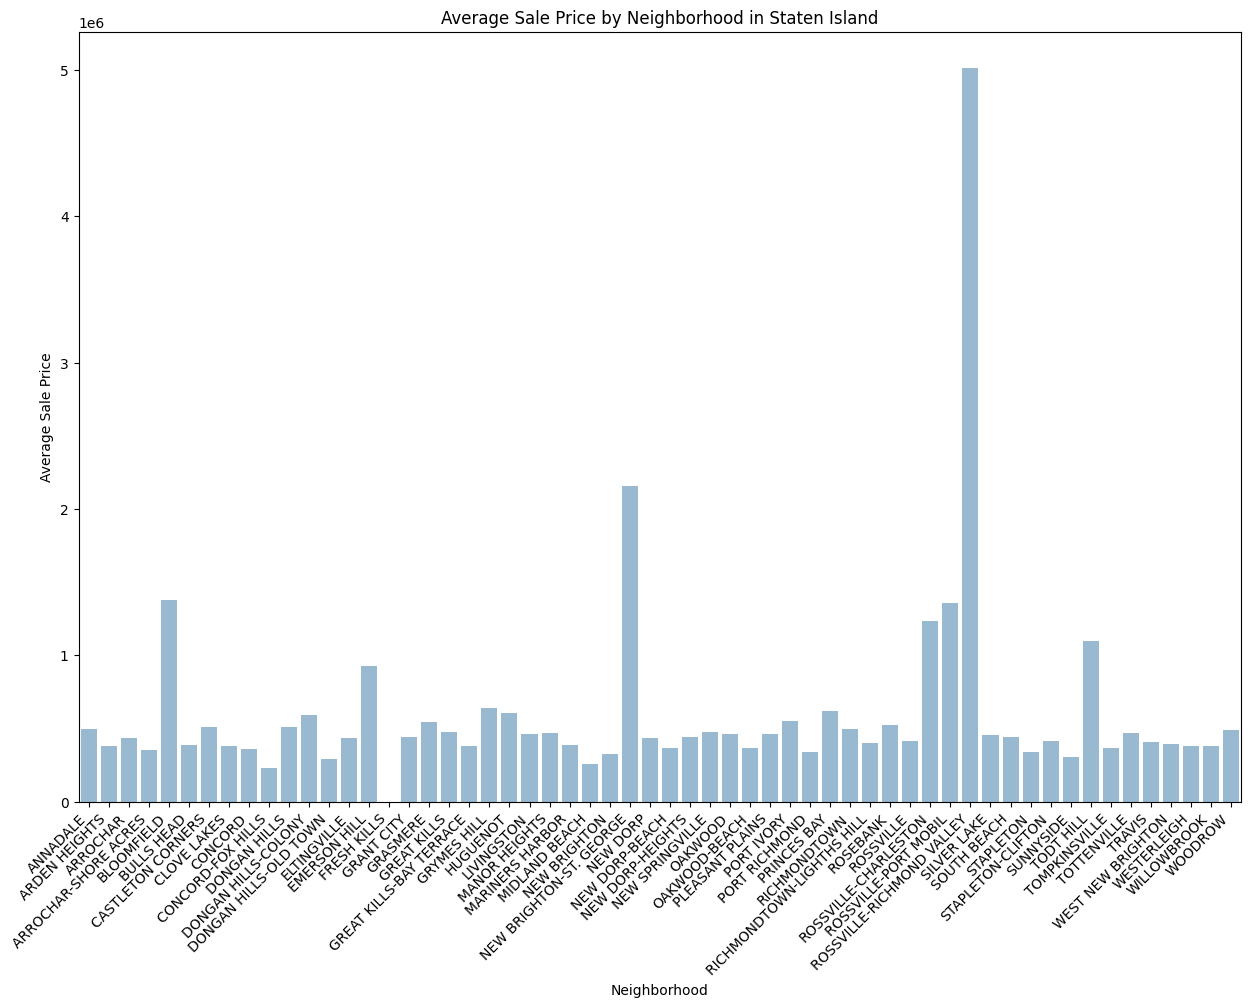

In [36]:
create_neighborhood_price_barplot(manhattan_df, 'Manhattan')
create_neighborhood_price_barplot(brooklyn_df, 'Brooklyn')
create_neighborhood_price_barplot(bronx_df, 'Bronx')
create_neighborhood_price_barplot(staten_island_df, 'Staten Island')

In [37]:
def create_year_build_price_lineplot(data, title):
  # Filter the data based on the year built and sale price conditions
  filtered_data = data[['YEAR BUILT', 'SALE PRICE']].dropna()
  filtered_data = filtered_data[(filtered_data['YEAR BUILT'] >= 1800) & (filtered_data['YEAR BUILT'] <= 2023) & (filtered_data['SALE PRICE'] > 1)] 
  
  # Group the data by year built and calculate the average sale price
  grouped_data = filtered_data.groupby('YEAR BUILT')['SALE PRICE'].mean().reset_index()

  # Create a line plot to visualize the relationship between year built and average sale price
  plt.figure(figsize=(15, 10))
  sns.lineplot(x='YEAR BUILT', y='SALE PRICE', data=grouped_data)
  plt.title(f'Relationship between Price and Year Built in {title}')
  plt.xlabel('Year Built')
  plt.ylabel('Average Sale Price')
  plt.show()

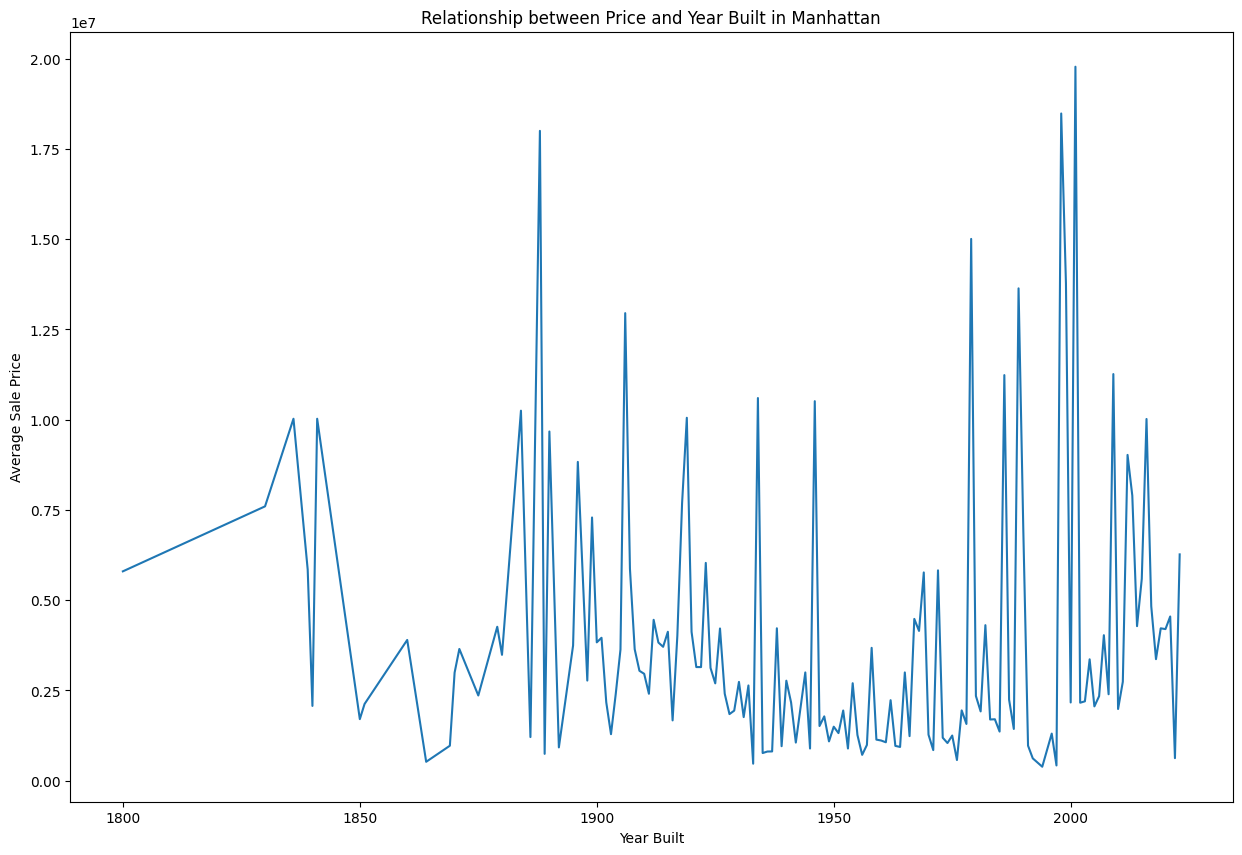

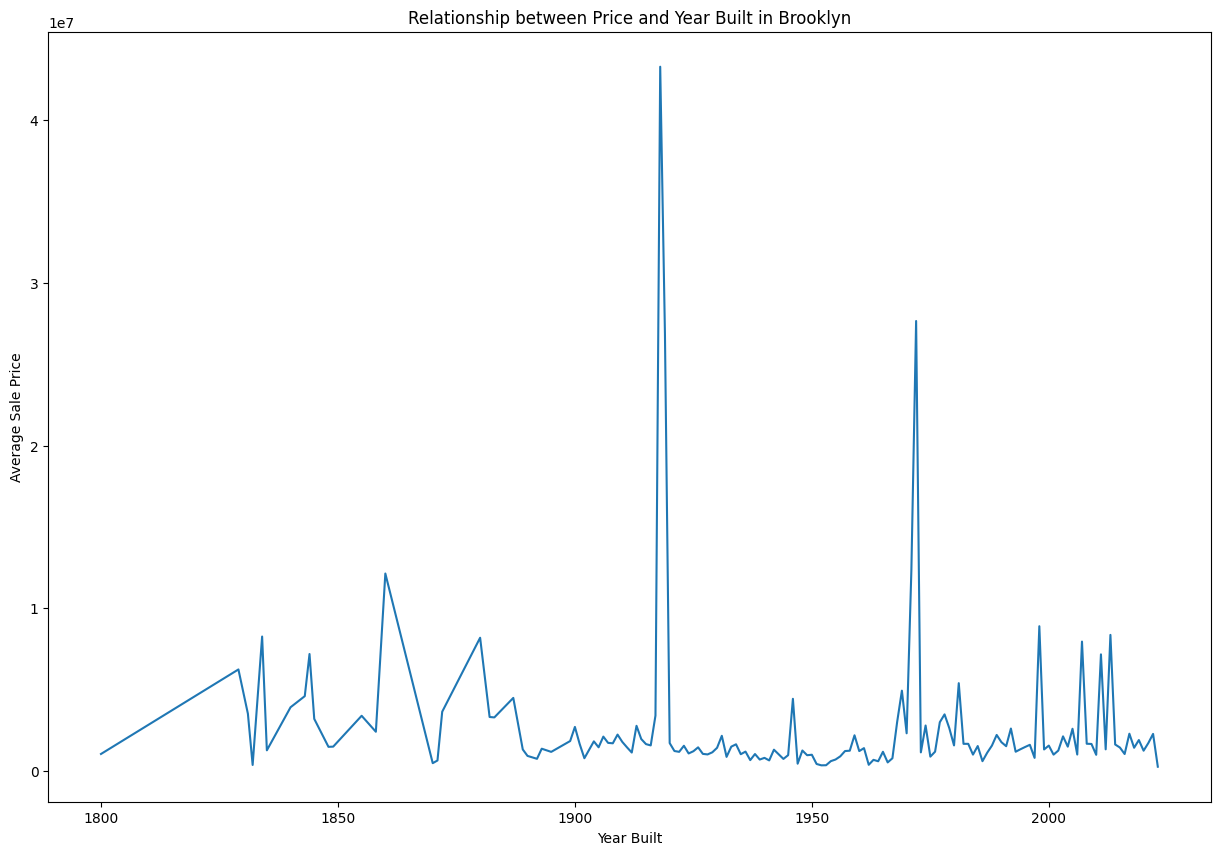

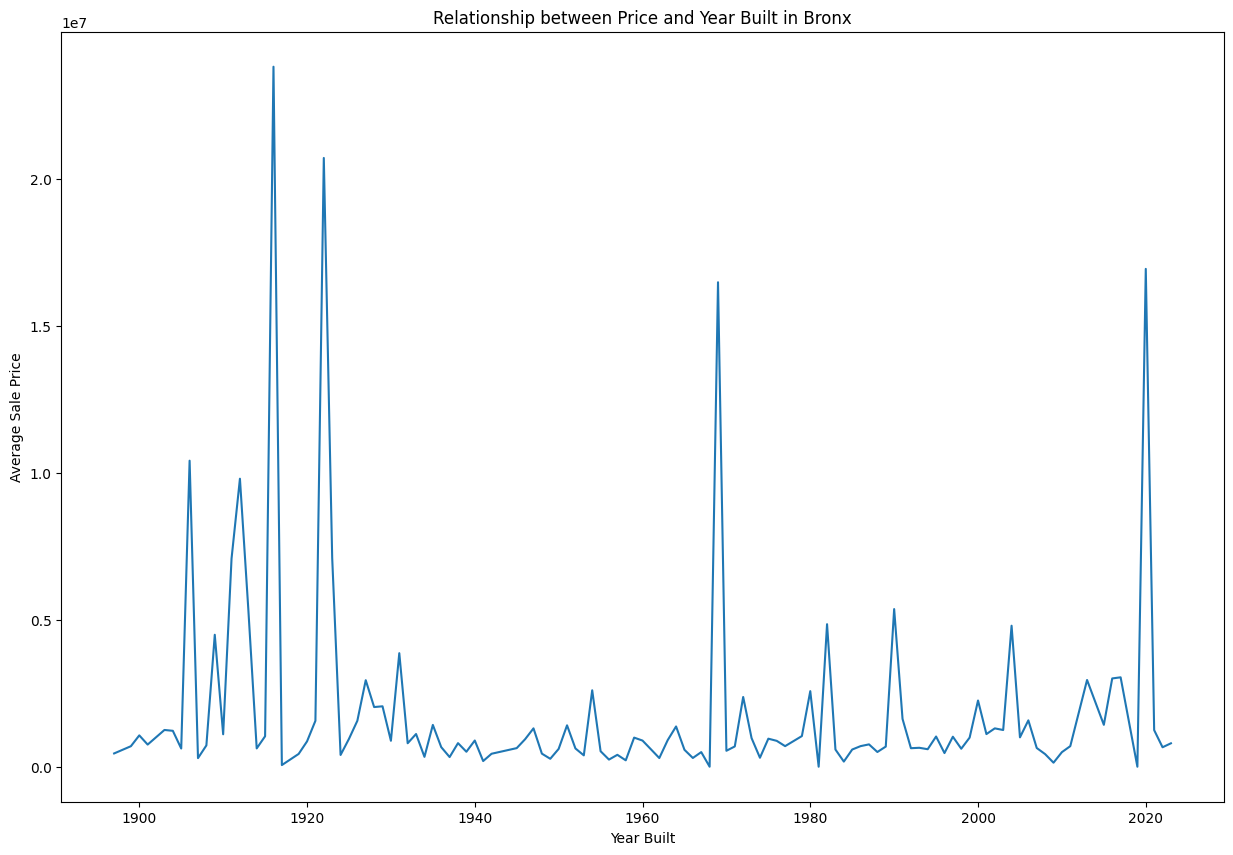

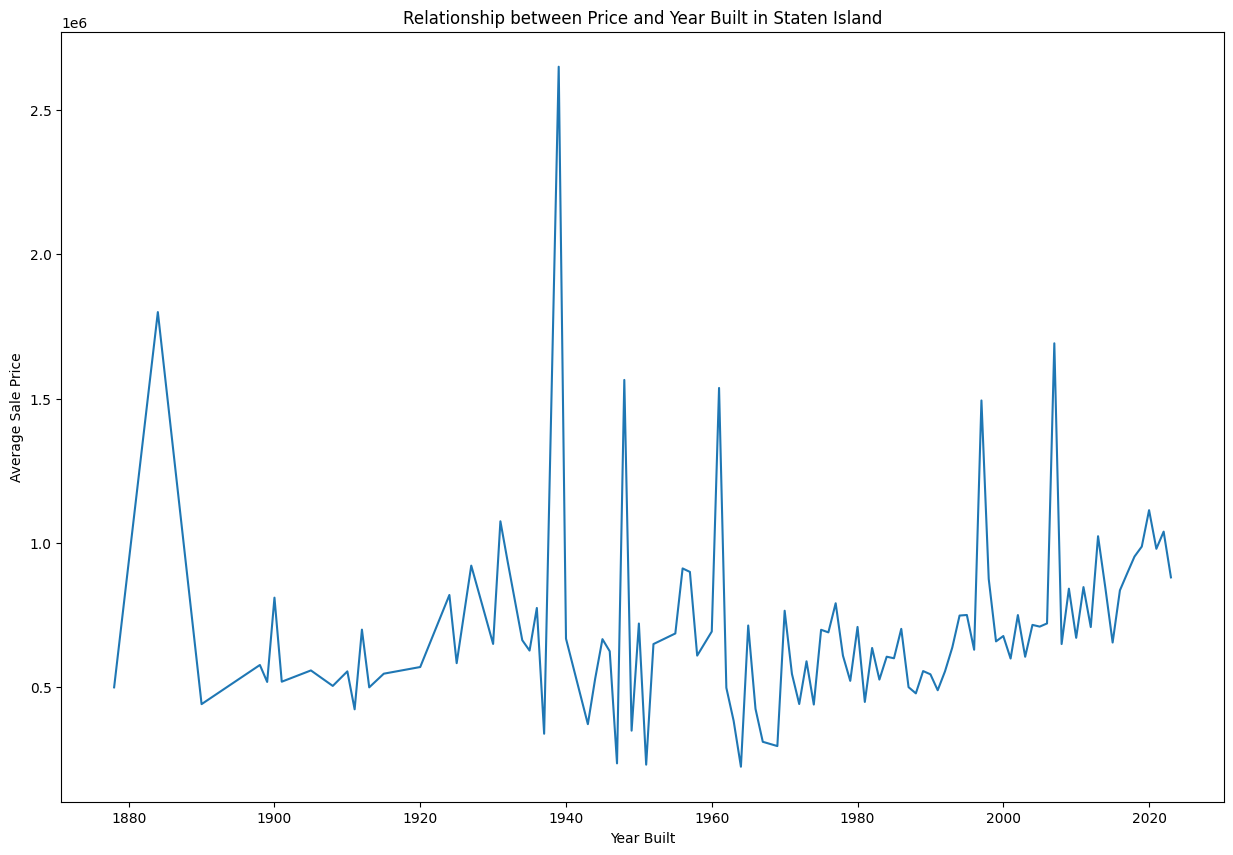

In [38]:
create_year_build_price_lineplot(manhattan_df, 'Manhattan')    
create_year_build_price_lineplot(brooklyn_df, 'Brooklyn')    
create_year_build_price_lineplot(bronx_df, 'Bronx')    
create_year_build_price_lineplot(staten_island_df, 'Staten Island')

In [39]:
def create_year_price_line(data, title):
  # Filter the data based on the sale date and sale price conditions
  filtered_data = data[['SALE DATE', 'SALE PRICE']].dropna()
  filtered_data = filtered_data[(filtered_data['SALE DATE'].dt.year >= 1950) & (filtered_data['SALE DATE'].dt.year <= 2023) & (filtered_data['SALE PRICE'] > 1)] 
  
  # Calculate the average price by year
  avg_price = filtered_data.groupby('SALE DATE')['SALE PRICE'].mean().reset_index()
  
  # Create a line plot to visualize the change in prices over the years
  plt.figure(figsize=(15, 10))
  sns.lineplot(x=avg_price['SALE DATE'], y=avg_price['SALE PRICE'], marker='.')
  plt.title(f'Change in Prices over the Years in {title}')
  plt.xlabel('Year of Purchase')
  plt.ylabel('Average Price')
  plt.show()

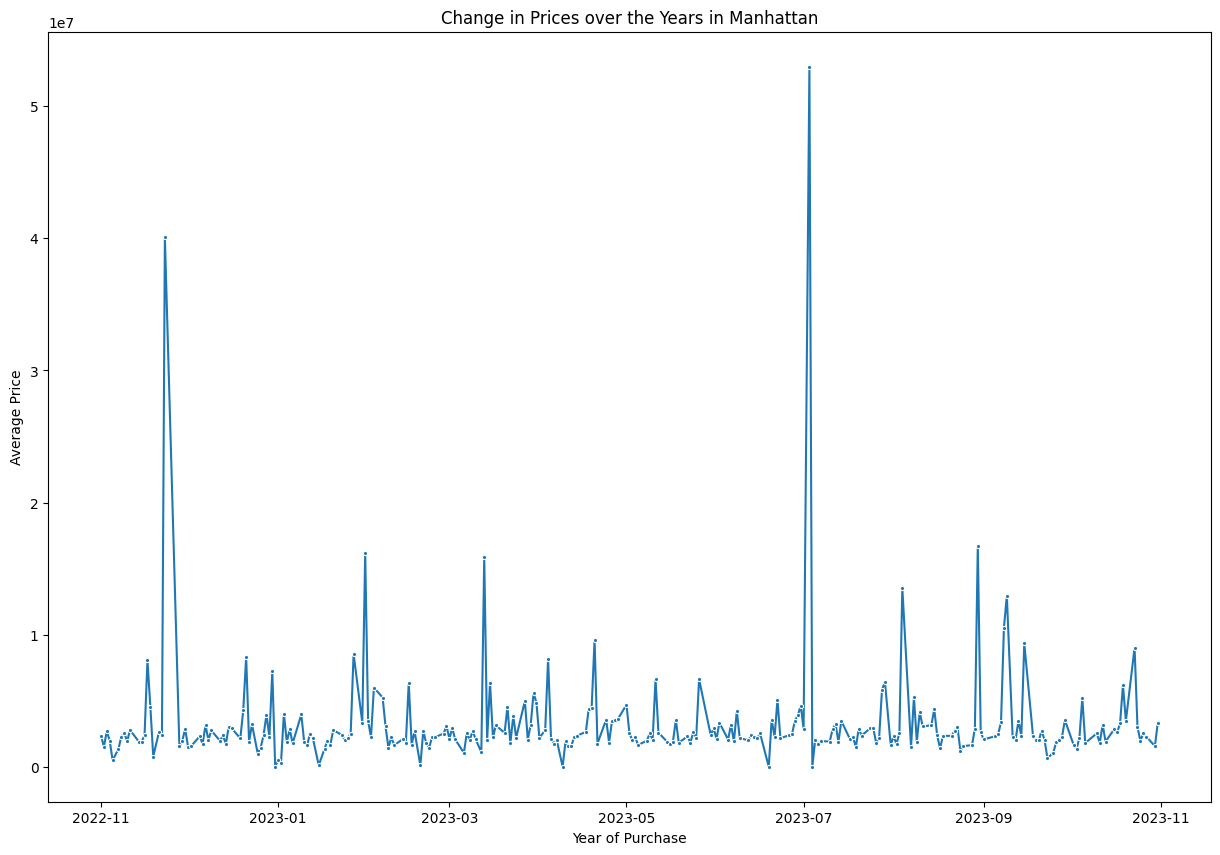

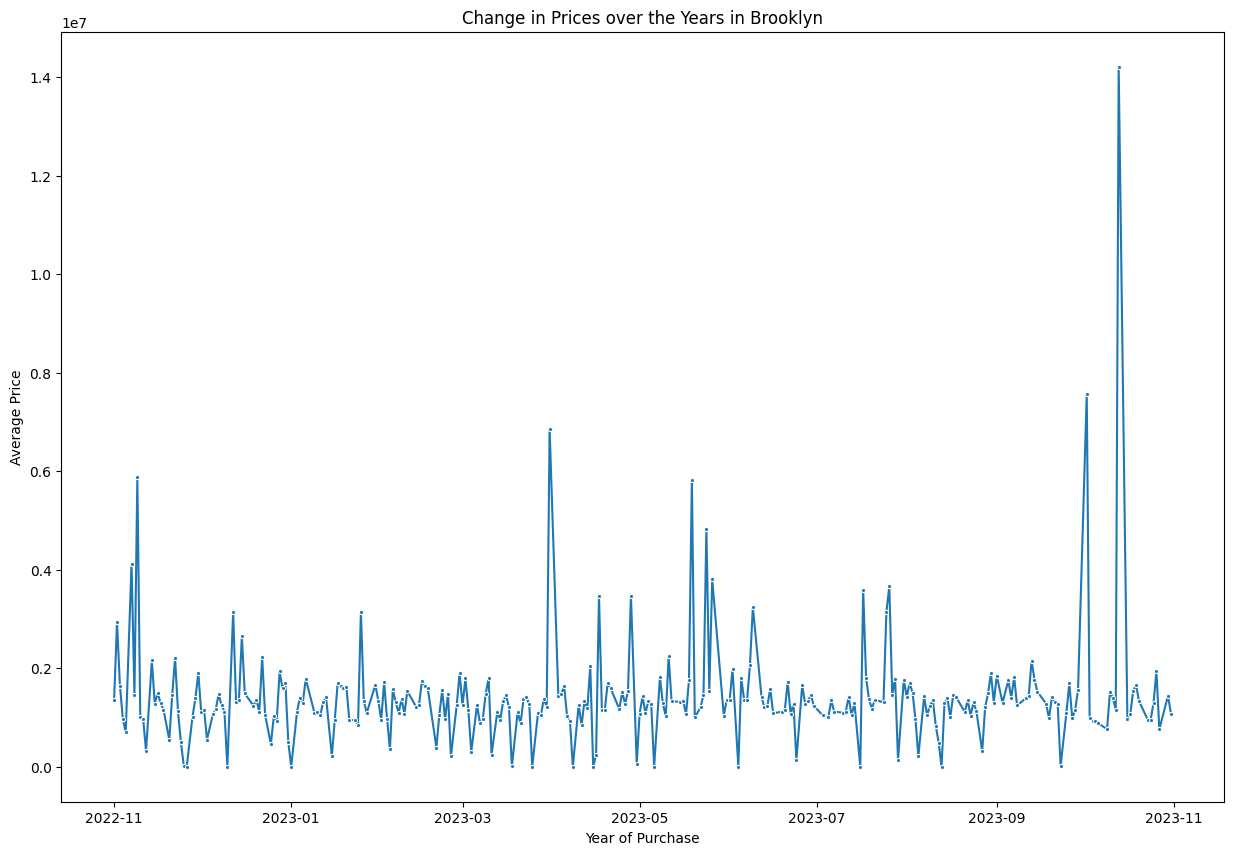

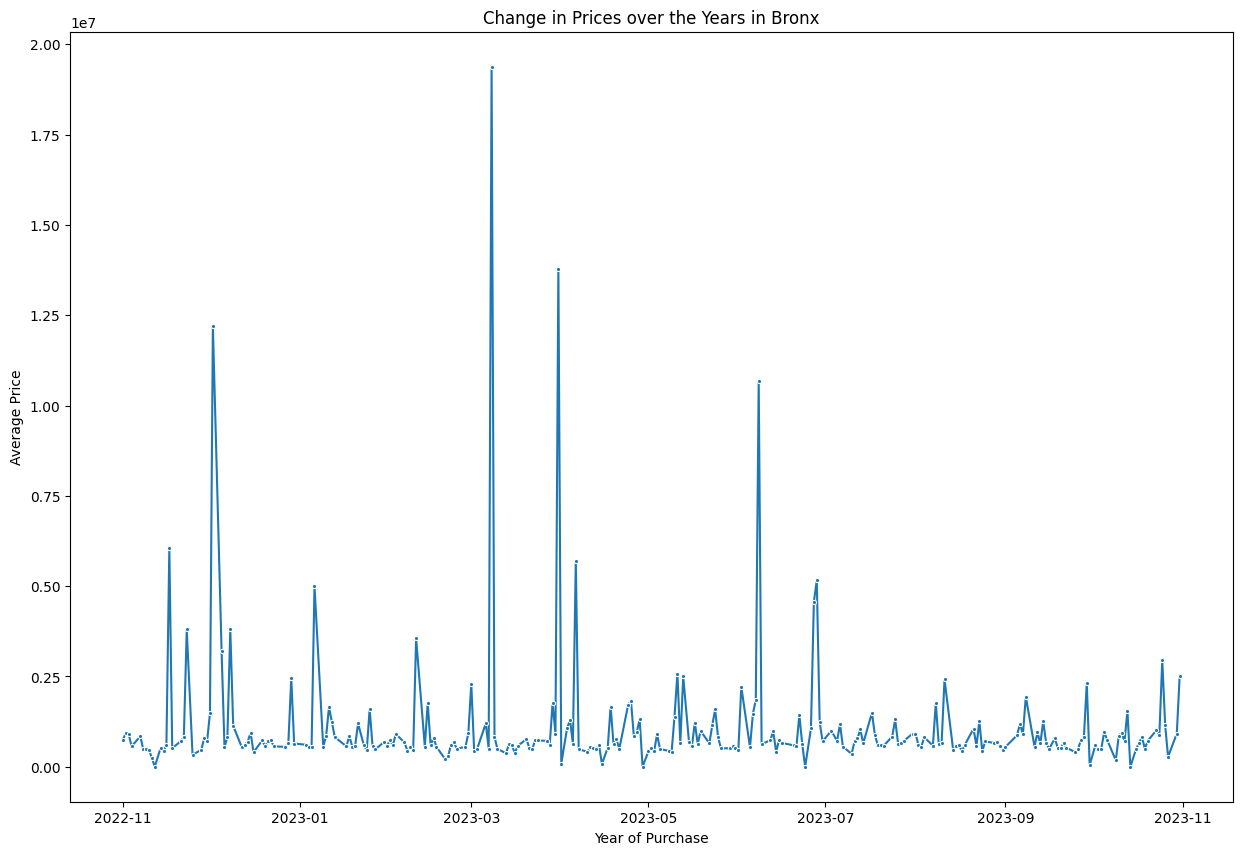

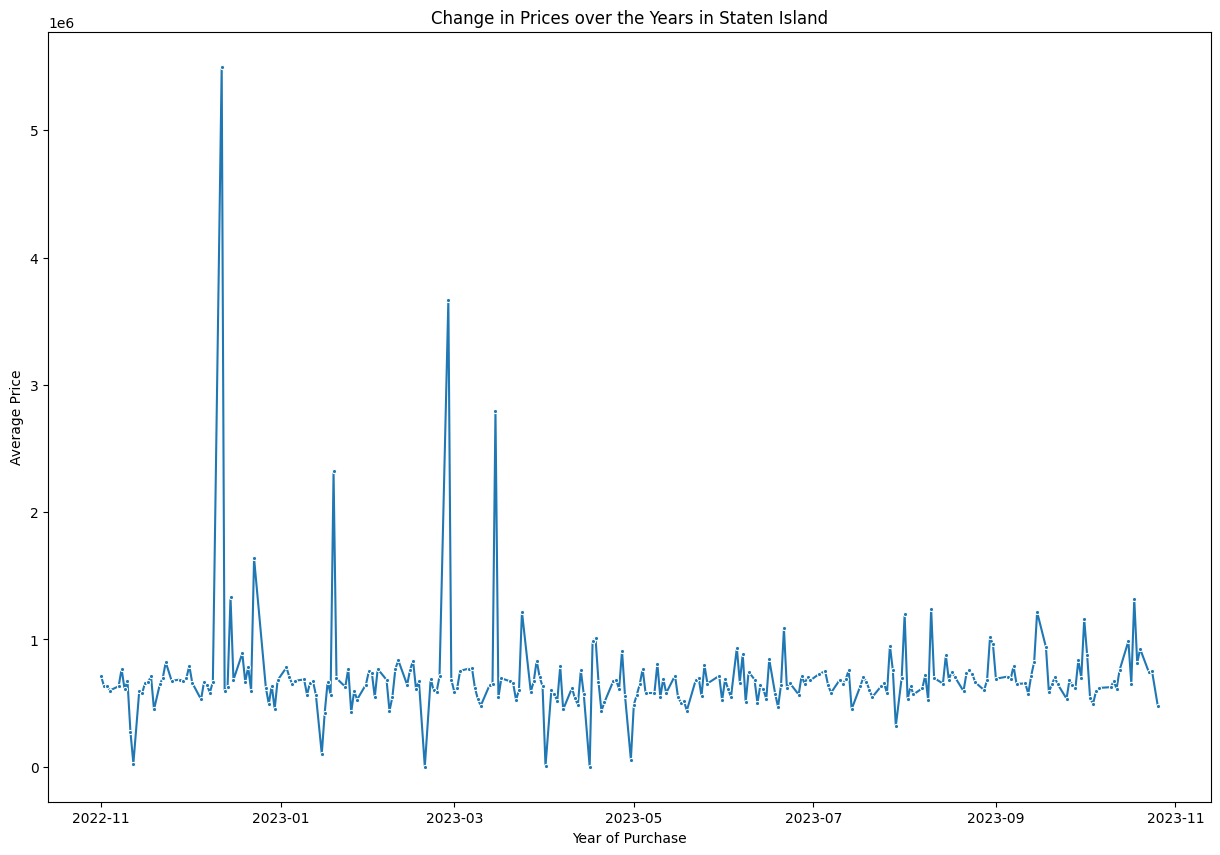

In [40]:
create_year_price_line(manhattan_df, 'Manhattan')    
create_year_price_line(brooklyn_df, 'Brooklyn')    
create_year_price_line(bronx_df, 'Bronx')    
create_year_price_line(staten_island_df, 'Staten Island')   

In [41]:
def build_type_by_year(data, title):
  filtered_data = data[(data['YEAR BUILT'] >= 1950) & (data['YEAR BUILT'] <= 2023)]
  plt.figure(figsize=(15, 10))
  sns.lineplot(x="YEAR BUILT", y="RESIDENTIAL UNITS", data=filtered_data, label="Residential Units")
  sns.lineplot(x="YEAR BUILT", y="COMMERCIAL UNITS", data=filtered_data, label="Commercial Units")
  plt.title(f"Change in the Number of Residential and Commercial Units over the Years in {title}")
  plt.xlabel("Year of Construction")
  plt.ylabel("Number of Buildings")
  plt.legend()
  
  plt.show()

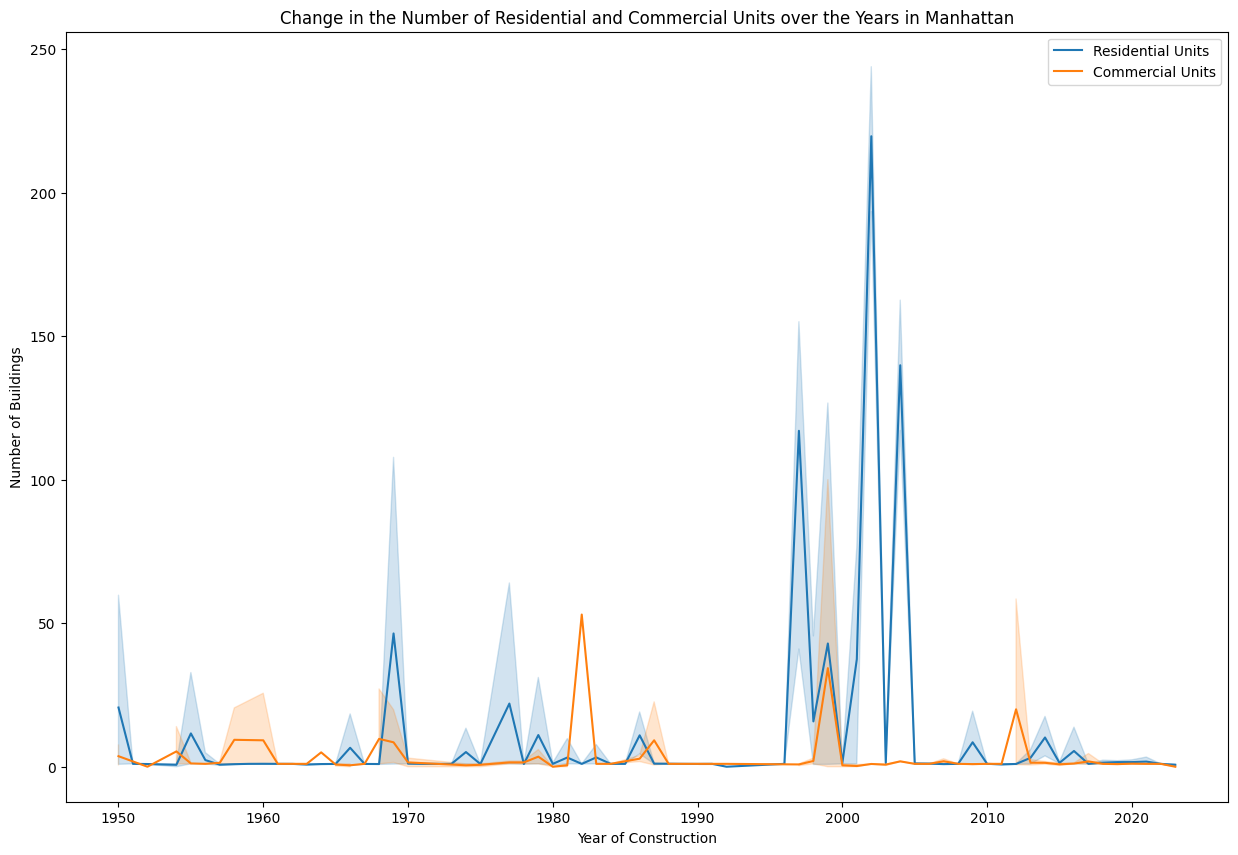

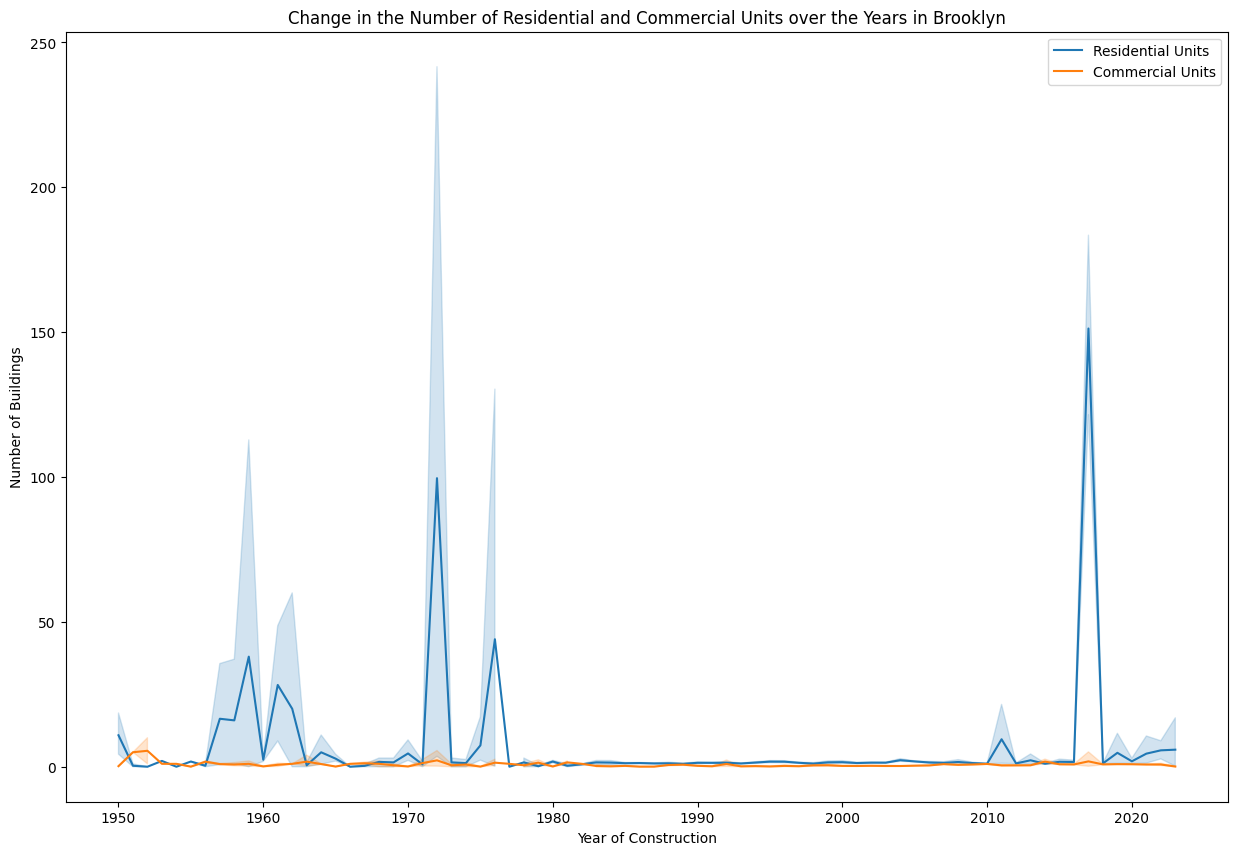

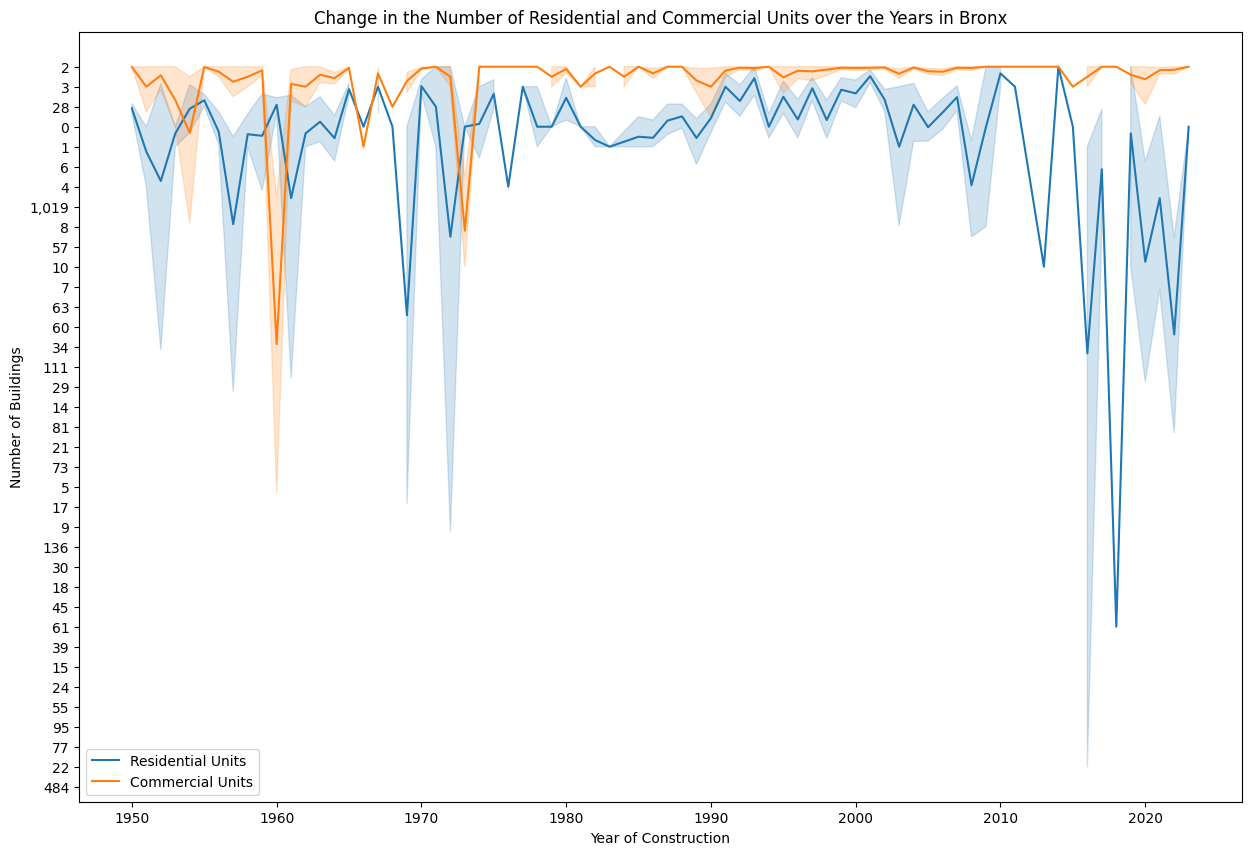

KeyboardInterrupt: 

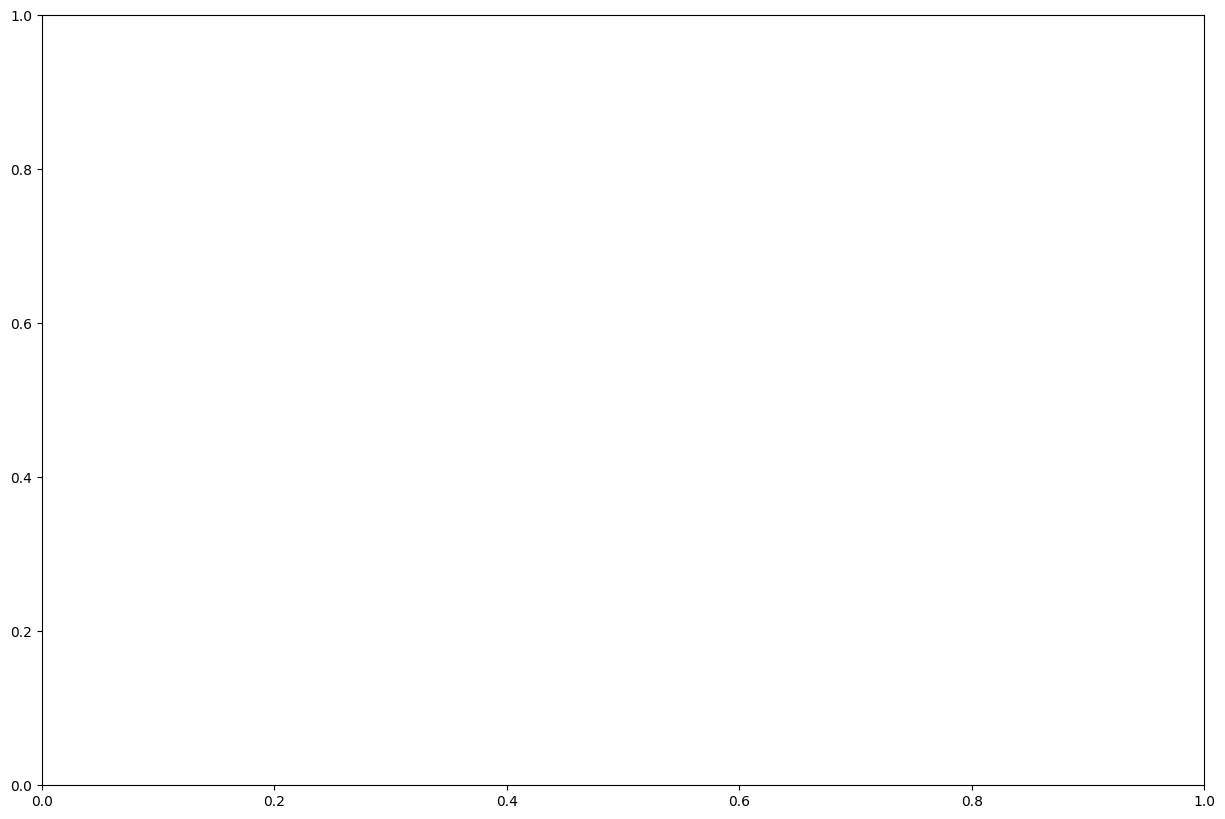

In [42]:
build_type_by_year(manhattan_df, 'Manhattan')
build_type_by_year(brooklyn_df, 'Brooklyn')
build_type_by_year(bronx_df, 'Bronx')
build_type_by_year(staten_island_df, 'Staten Island')


In [ ]:
def building_types_by_neighborhood(data, title):
  # Select relevant columns and drop rows with missing values
  data = data[['NEIGHBORHOOD', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS']].dropna()
  
  # Group the data by neighborhood and calculate the mean of residential and commercial units
  grouped_data = data.groupby('NEIGHBORHOOD')[['RESIDENTIAL UNITS', 'COMMERCIAL UNITS']].mean().reset_index()
  
  # Create a bar plot to visualize the number of residential and commercial units by neighborhood
  plt.figure(figsize=(15, 10))
  sns.barplot(x=grouped_data['NEIGHBORHOOD'], y=grouped_data['RESIDENTIAL UNITS'], alpha=0.2, label='Residential')
  sns.barplot(x=grouped_data['NEIGHBORHOOD'], y=grouped_data['COMMERCIAL UNITS'], label='Commercial')
  plt.xticks(rotation=45, ha='right')
  plt.title(f"Number of Residential and Commercial Units by Neighborhood in {title}")
  plt.xlabel("Neighborhood")
  plt.ylabel("Number of Buildings")
  plt.legend()
  plt.show()

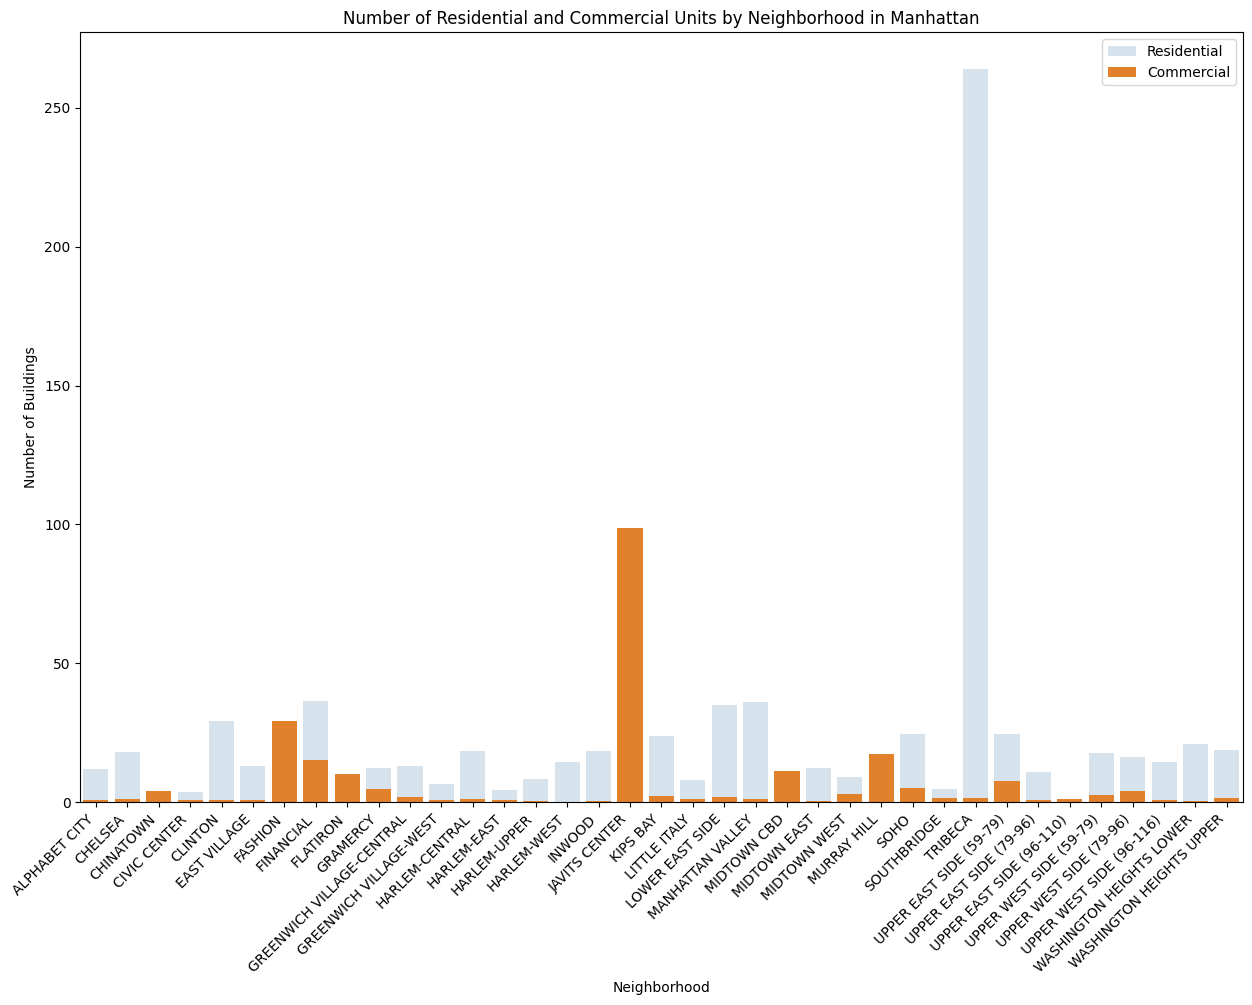

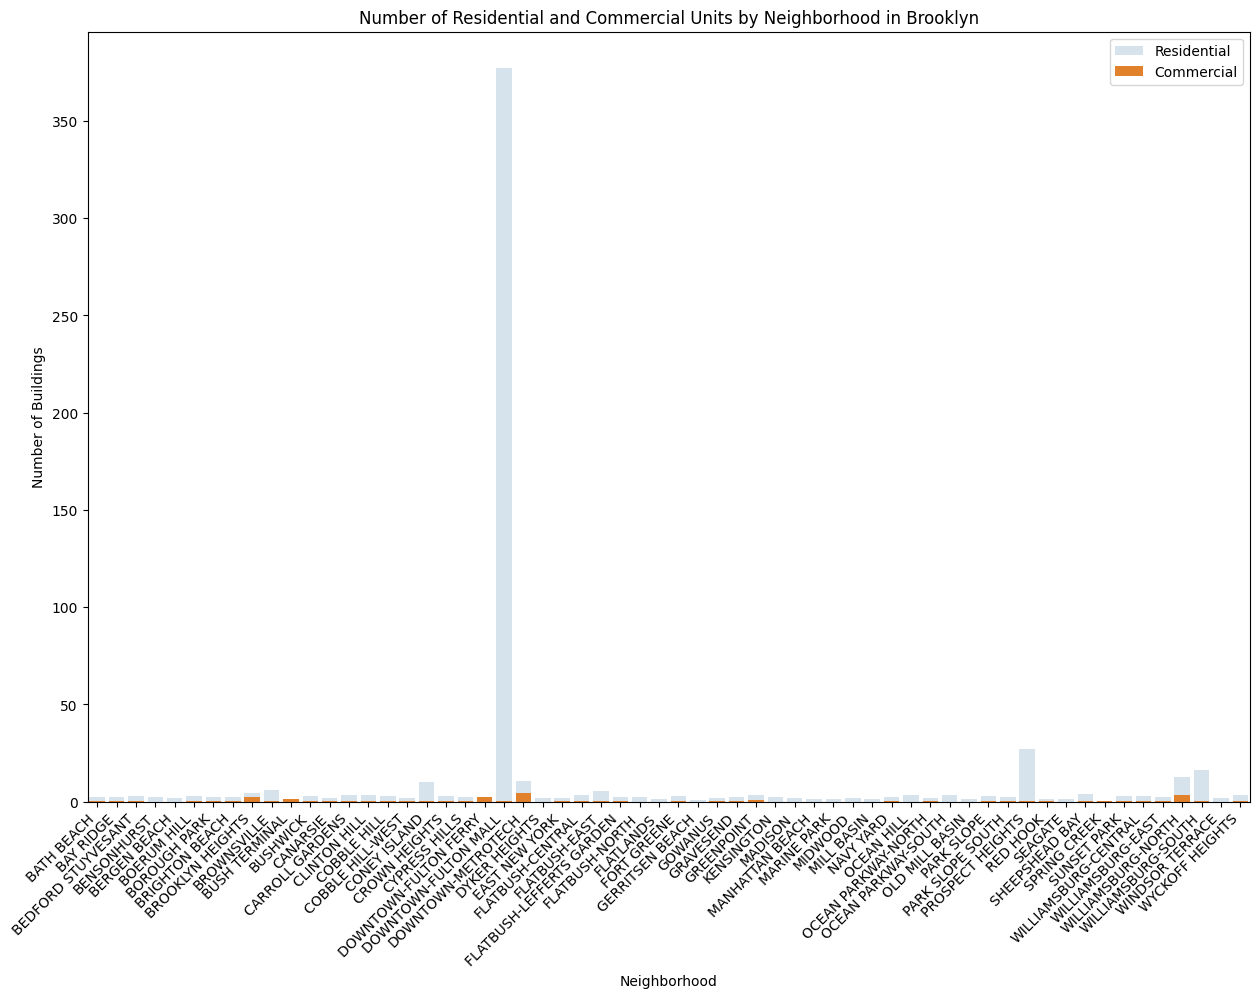

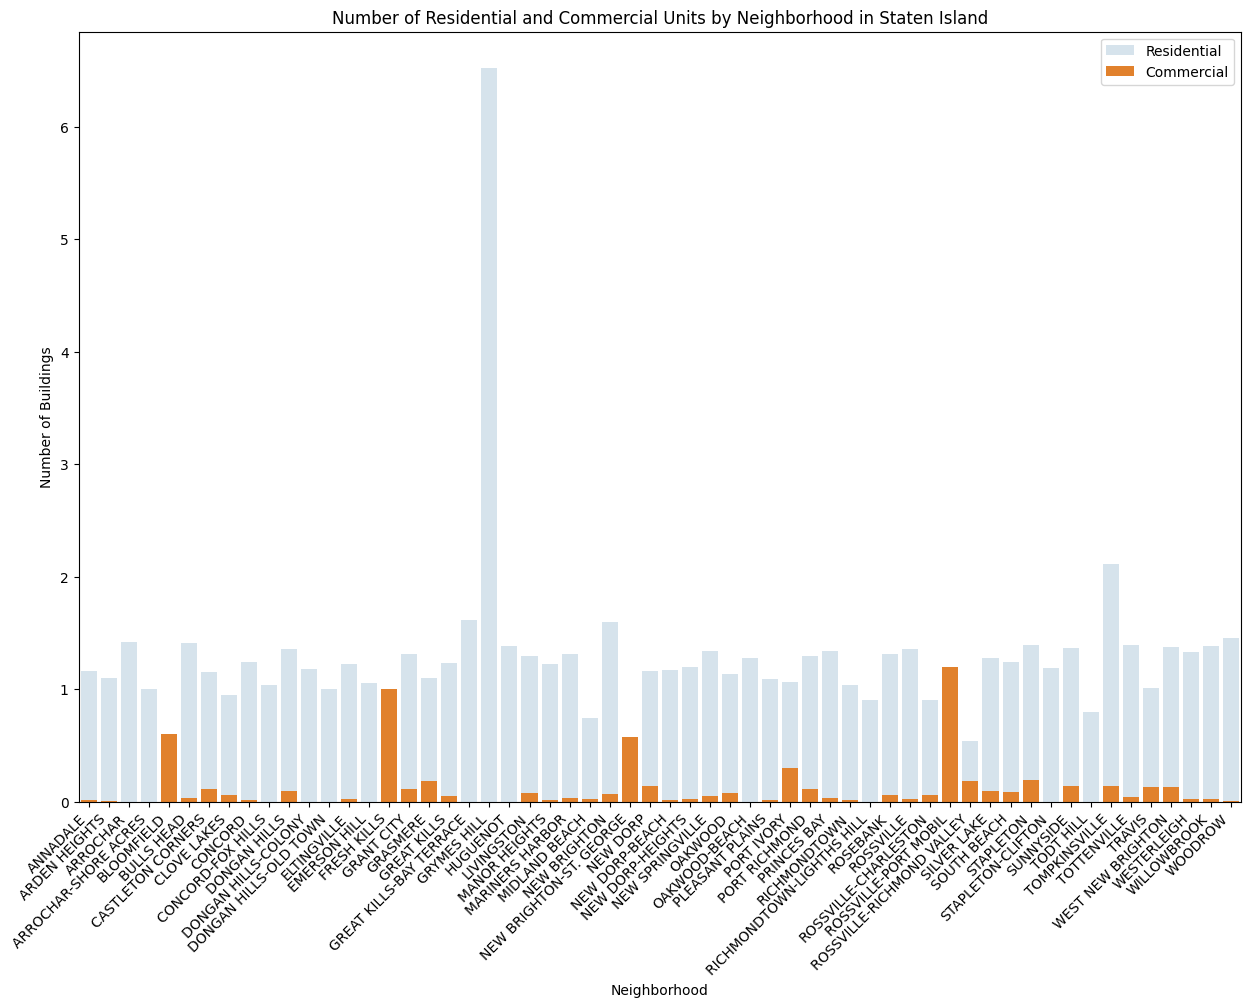

In [43]:
building_types_by_neighborhood(manhattan_df, 'Manhattan')
building_types_by_neighborhood(brooklyn_df, 'Brooklyn')
building_types_by_neighborhood(staten_island_df, 'Staten Island')

In [ ]:
def count_sales_by_year(data, title):
  plt.figure(figsize=(15, 10))
  sns.countplot(x=data['SALE DATE'].dt.year)
  plt.title(f'Number of Sales by Year in {title}')
  plt.xlabel('Year')
  plt.ylabel('Number of Sales')
  plt.show()

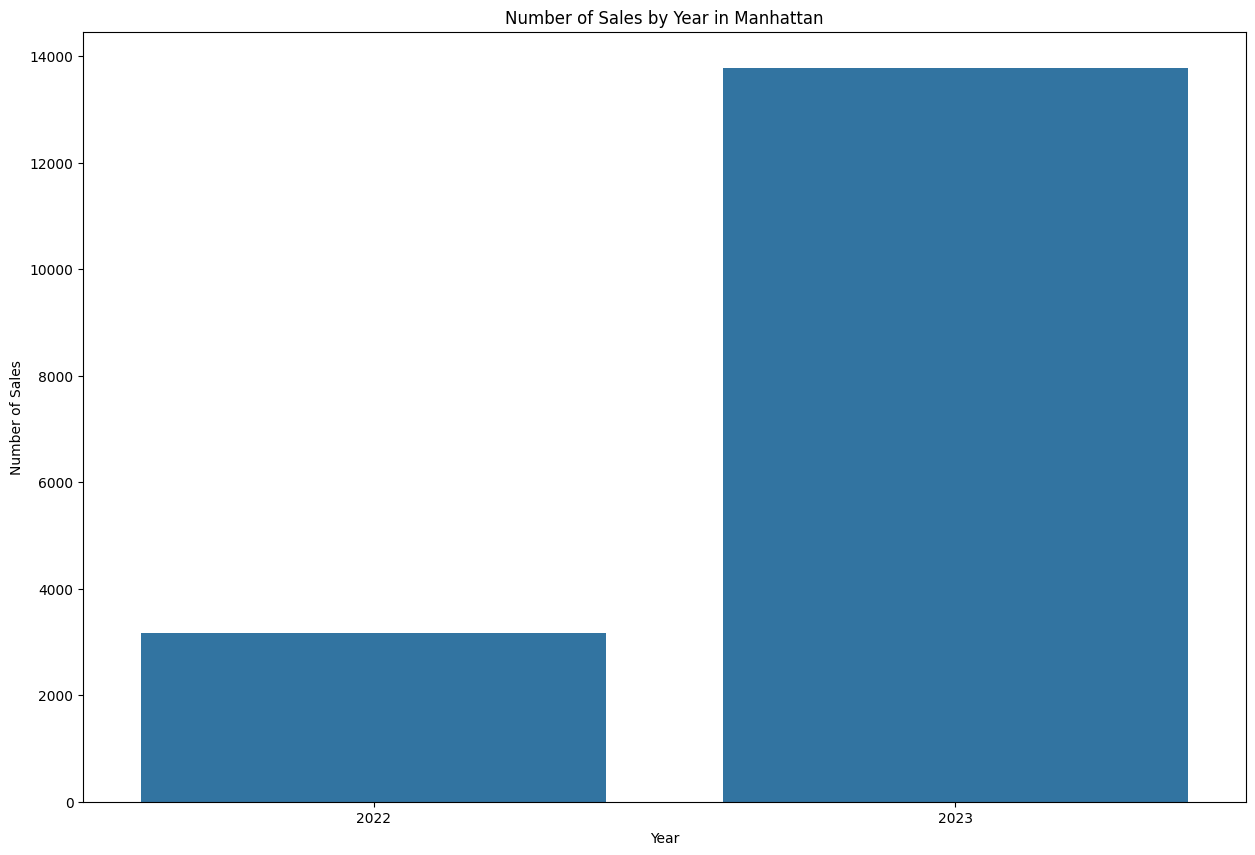

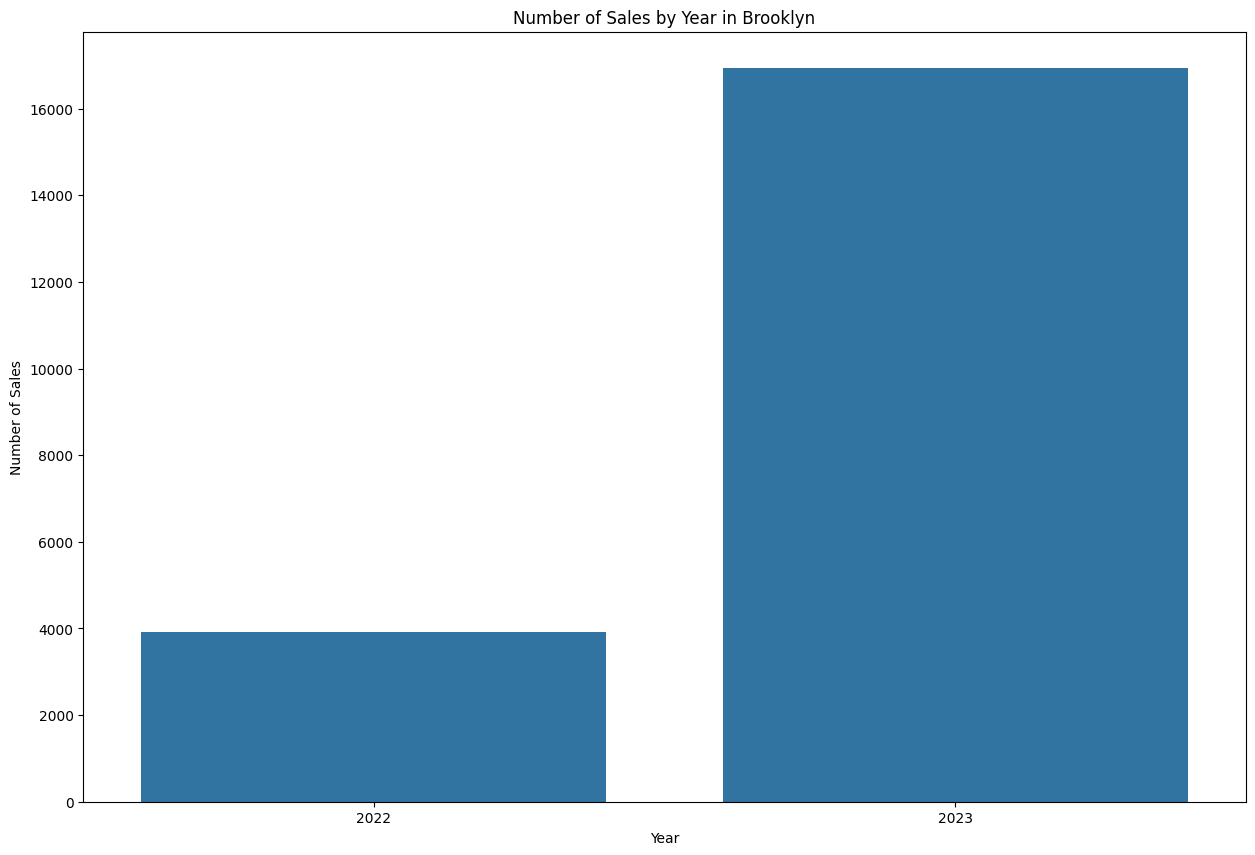

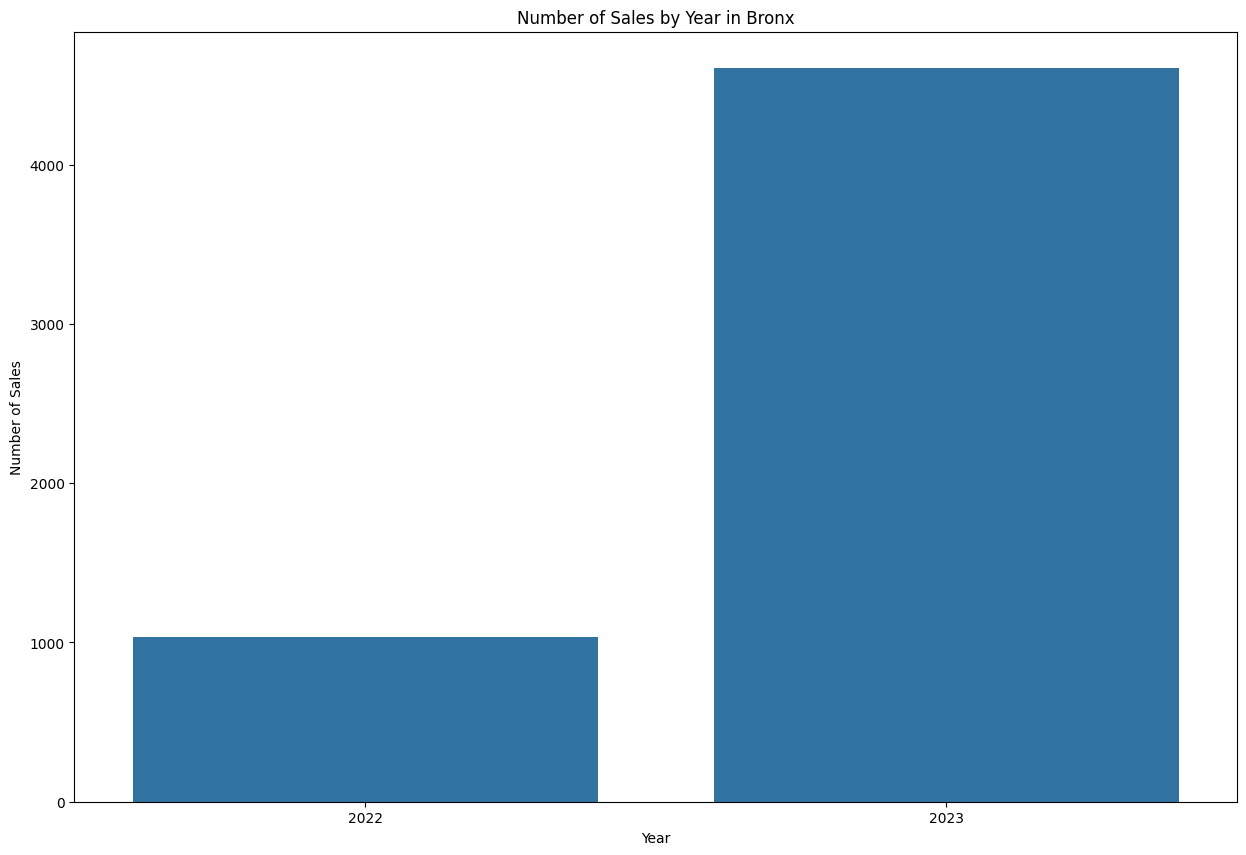

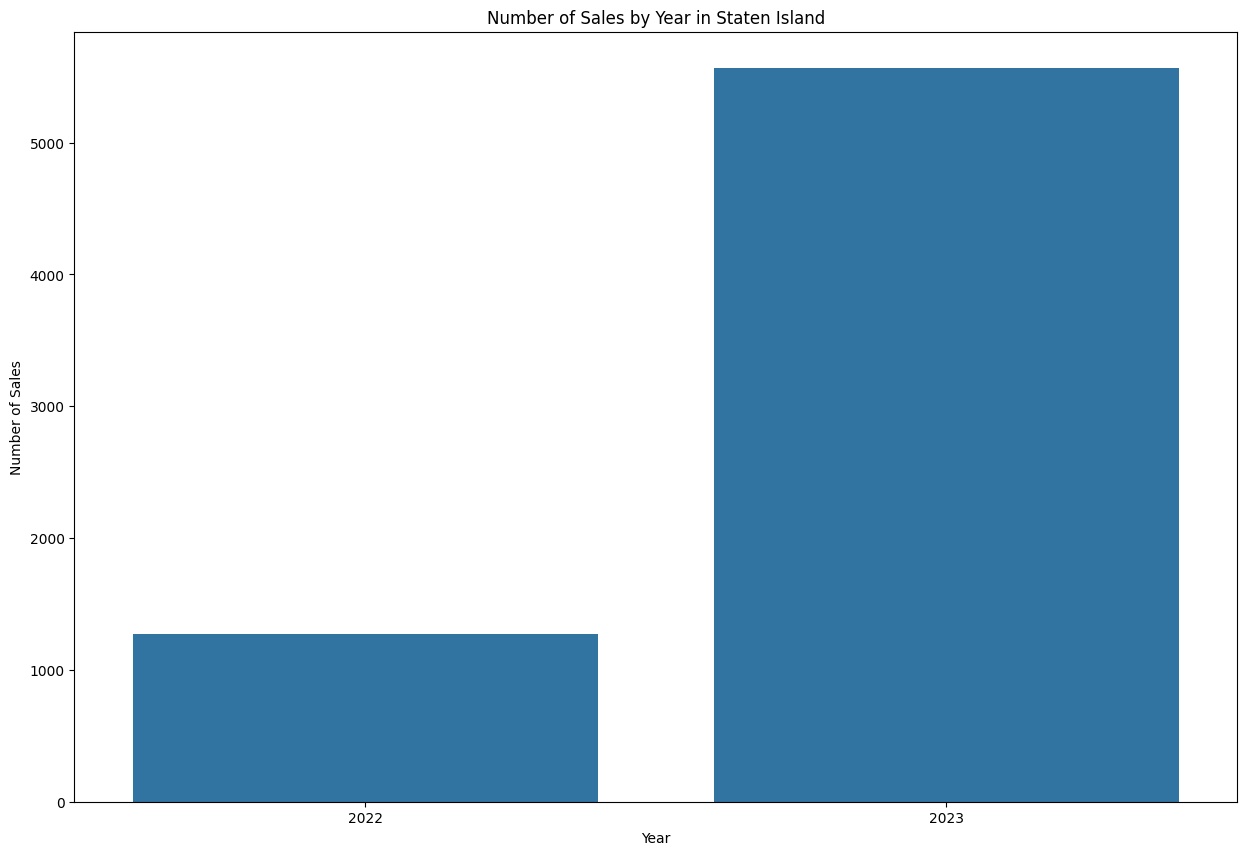

In [ ]:
count_sales_by_year(manhattan_df, 'Manhattan')
count_sales_by_year(brooklyn_df, 'Brooklyn')
count_sales_by_year(bronx_df, 'Bronx')
count_sales_by_year(staten_island_df, 'Staten Island')

In [ ]:
def count_sales_by_neighborhood(data, title):
  plt.figure(figsize=(15, 10))
  sns.countplot(x=data['NEIGHBORHOOD'])
  plt.xticks(rotation=45, ha='right')
  plt.title(f'Number of Sales by Neighborhood in {title}')
  plt.xlabel('Neighborhood')
  plt.ylabel('Number of Buildings')
  plt.show()

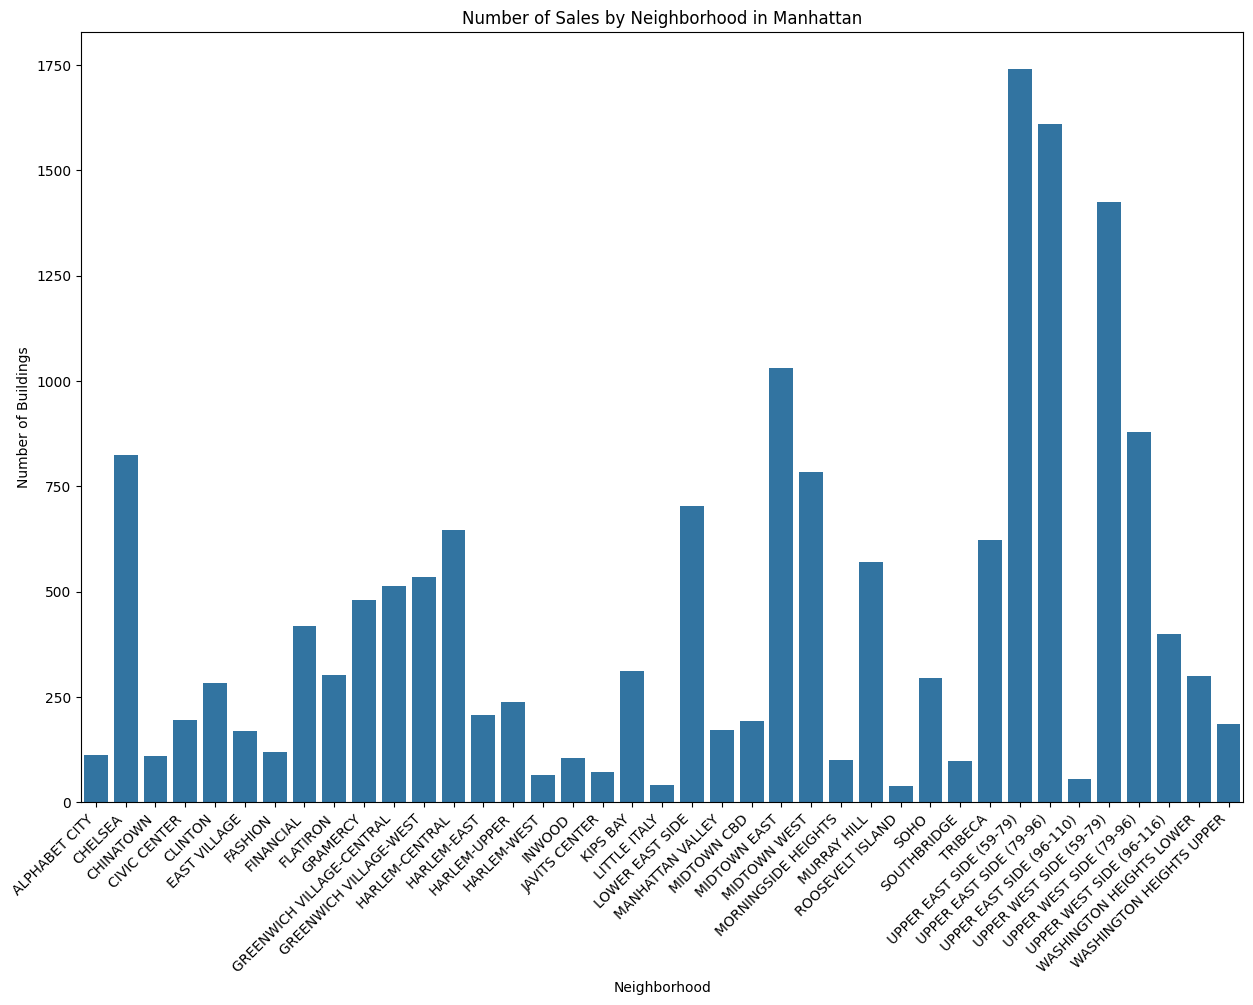

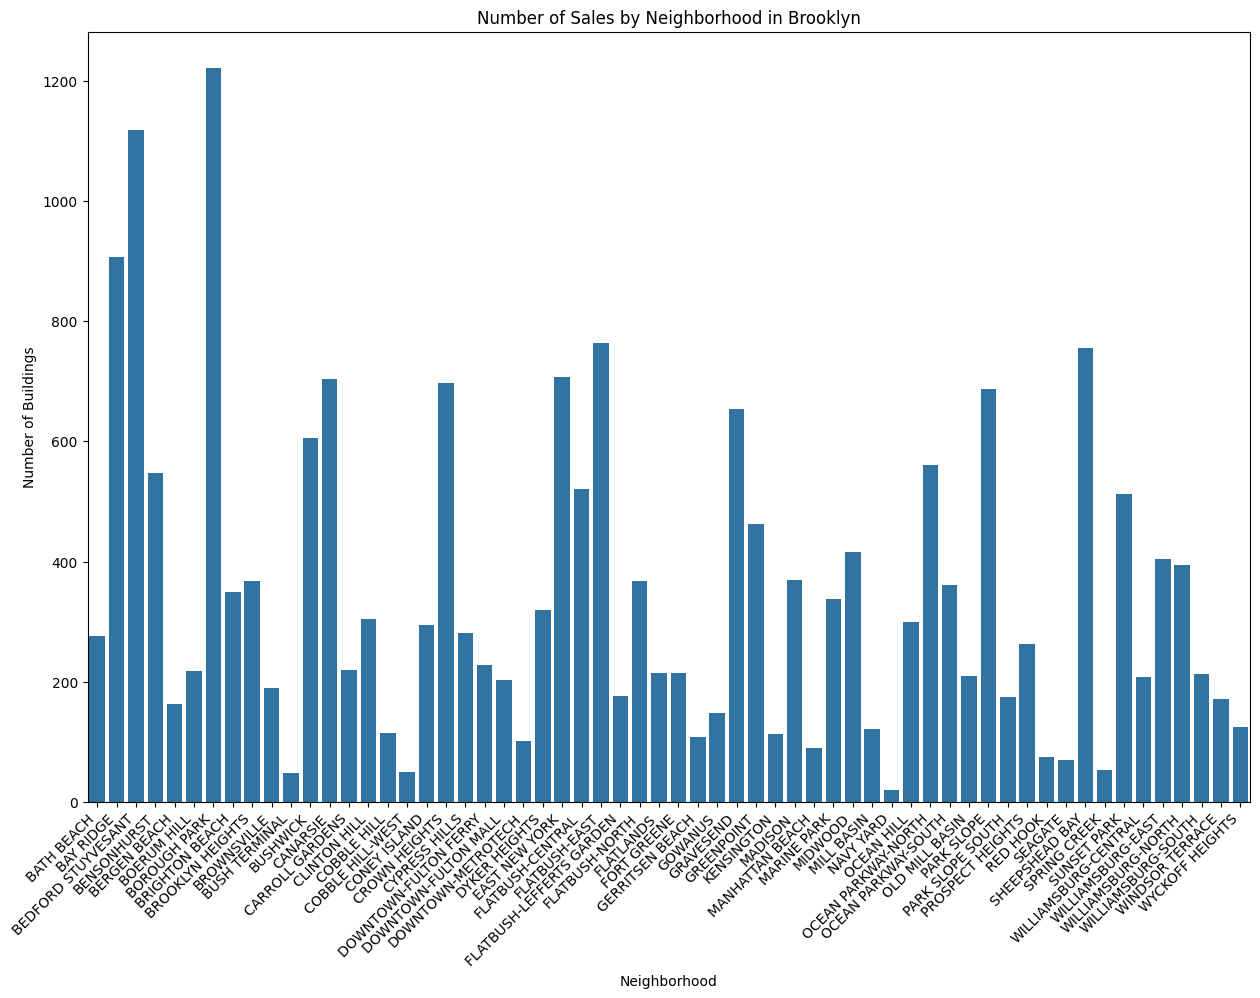

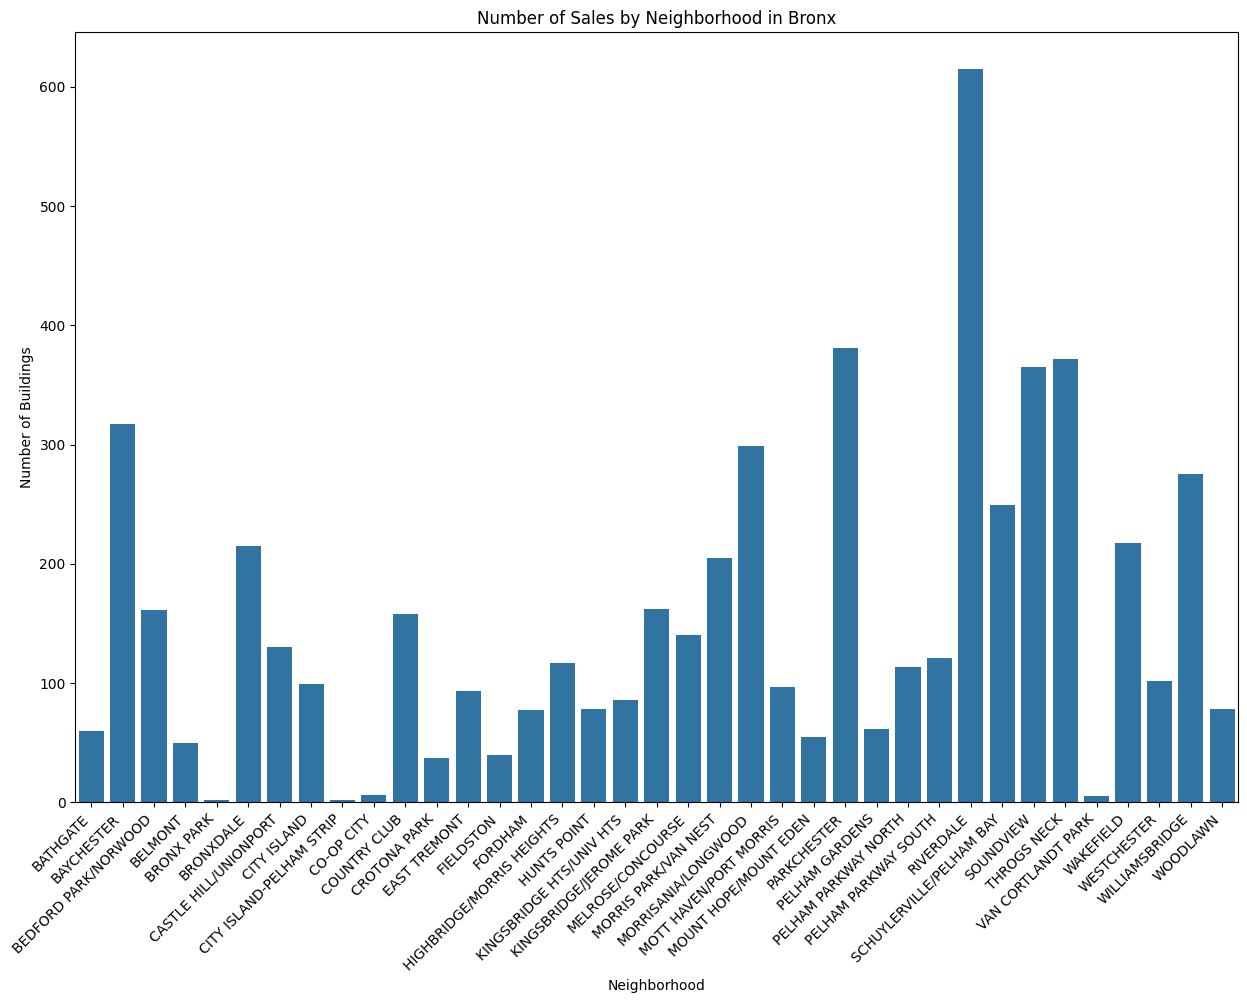

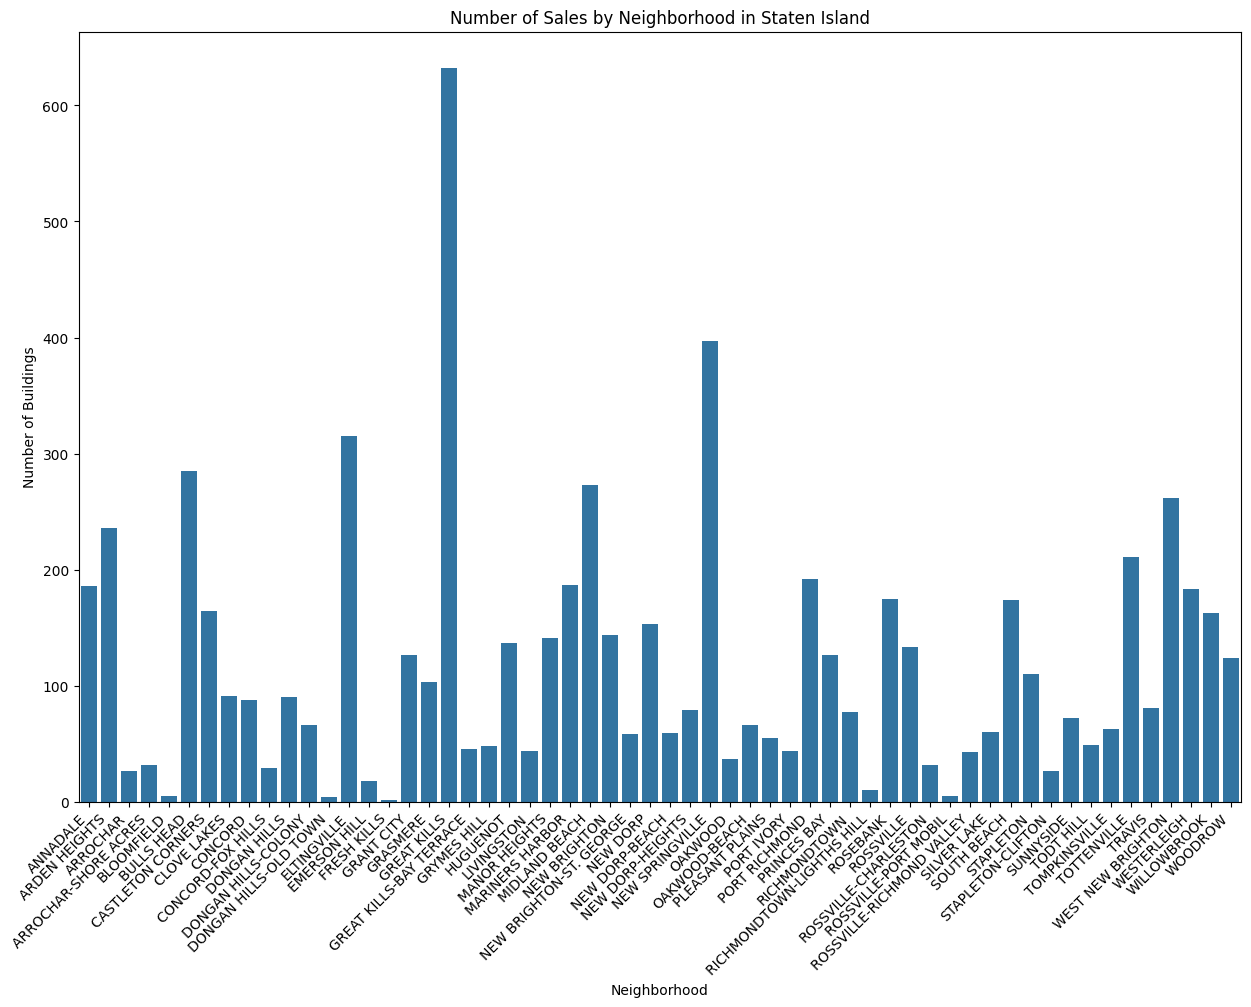

In [ ]:
count_sales_by_neighborhood(manhattan_df, 'Manhattan')
count_sales_by_neighborhood(brooklyn_df, 'Brooklyn')
count_sales_by_neighborhood(bronx_df, 'Bronx')
count_sales_by_neighborhood(staten_island_df, 'Staten Island')